## Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

## Importing and Displaying Data

# JANUARY

In [2]:
Jan_2019 = pd.read_csv('file:Sales_Data/Sales_January_2019.csv')

In [3]:
Jan_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [4]:
Jan_2019 = Jan_2019.loc[Jan_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [5]:
Jan_2019['Price Each'] = pd.to_numeric(Jan_2019['Price Each'])

<ipython-input-5-cebf374c8d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019['Price Each'] = pd.to_numeric(Jan_2019['Price Each'])


In [6]:
Jan_2019['Quantity Ordered'] = pd.to_numeric(Jan_2019['Quantity Ordered'])

<ipython-input-6-451dfb8fcd2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019['Quantity Ordered'] = pd.to_numeric(Jan_2019['Quantity Ordered'])


In [7]:
Jan_2019.isnull().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [8]:
Jan_2019.dropna(inplace = True)

<ipython-input-8-222a6245b1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019.dropna(inplace = True)


In [9]:
Jan_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
Jan_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-10-e39d632195ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [11]:
Jan_2019['Total_Price'] = Jan_2019['Quantity Ordered'] * Jan_2019['Price Each']

<ipython-input-11-8cf50cfad3c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019['Total_Price'] = Jan_2019['Quantity Ordered'] * Jan_2019['Price Each']


In [12]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99


In [13]:
Jan_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9671 non-null   object 
 1   Product           9671 non-null   object 
 2   Quantity Ordered  9671 non-null   float64
 3   Price Each        9671 non-null   float64
 4   Order Date        9671 non-null   object 
 5   Purchase Address  9671 non-null   object 
 6   Total_Price       9671 non-null   float64
dtypes: float64(3), object(4)
memory usage: 604.4+ KB


In [14]:
Jan_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,9671.000000,9671.000000,9671.000000
mean,1.122738,186.554657,187.621916
std,0.442484,330.905564,331.199824
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,1999.980000


In [15]:
Jan_2019['NewYork'] = Jan_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-15-d824d1a3d7ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_2019['NewYork'] = Jan_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [16]:
Jan_2019 = Jan_2019[Jan_2019['NewYork']]

In [17]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
30,141264,Apple Airpods Headphones,1.0,150.00,01/03/19 09:46,"937 Highland St, New York City, NY 10001",150.00,True
34,141268,AA Batteries (4-pack),1.0,3.84,01/14/19 10:13,"611 Elm St, New York City, NY 10001",3.84,True
38,141272,AAA Batteries (4-pack),1.0,2.99,01/12/19 13:09,"818 Lincoln St, New York City, NY 10001",2.99,True
45,141278,Lightning Charging Cable,1.0,14.95,01/26/19 12:14,"100 Cherry St, New York City, NY 10001",14.95,True
49,141282,Vareebadd Phone,1.0,400.00,01/11/19 18:10,"125 Center St, New York City, NY 10001",400.00,True


In [18]:
Jan_total = Jan_2019['Total_Price'].sum()
Jan_total

258488.72

# FEBRUARY

In [19]:
Feb_2019 = pd.read_csv('file:Sales_Data/Sales_February_2019.csv')

In [20]:
Feb_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [21]:
Feb_2019 = Feb_2019.loc[Feb_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [22]:
Feb_2019['Price Each'] = pd.to_numeric(Feb_2019['Price Each'])

<ipython-input-22-1b1ac78f42a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019['Price Each'] = pd.to_numeric(Feb_2019['Price Each'])


In [23]:
Feb_2019['Quantity Ordered'] = pd.to_numeric(Feb_2019['Quantity Ordered'])

<ipython-input-23-2768a8a1f425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019['Quantity Ordered'] = pd.to_numeric(Feb_2019['Quantity Ordered'])


In [24]:
Feb_2019.isnull().sum()

Order ID            32
Product             32
Quantity Ordered    32
Price Each          32
Order Date          32
Purchase Address    32
dtype: int64

In [25]:
Feb_2019.dropna(inplace = True)

<ipython-input-25-07f575fa044d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019.dropna(inplace = True)


In [26]:
Feb_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [27]:
Feb_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-27-99b4fc4e0bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [28]:
Feb_2019['Total_Price'] = Feb_2019['Quantity Ordered'] * Feb_2019['Price Each']

<ipython-input-28-7fa90e43ac70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019['Total_Price'] = Feb_2019['Quantity Ordered'] * Feb_2019['Price Each']


In [29]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,150502,iPhone,1.0,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",700.00
1,150503,AA Batteries (4-pack),1.0,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",3.84
2,150504,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",389.99
3,150505,Lightning Charging Cable,1.0,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",14.95
4,150506,AA Batteries (4-pack),2.0,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",7.68


In [30]:
Feb_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          11968 non-null  object 
 1   Product           11968 non-null  object 
 2   Quantity Ordered  11968 non-null  float64
 3   Price Each        11968 non-null  float64
 4   Order Date        11968 non-null  object 
 5   Purchase Address  11968 non-null  object 
 6   Total_Price       11968 non-null  float64
dtypes: float64(3), object(4)
memory usage: 748.0+ KB


In [31]:
Feb_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,11968.000000,11968.000000,11968.000000
mean,1.123245,182.853890,183.951947
std,0.431408,325.695542,325.741486
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,1700.000000


In [32]:
Feb_2019['NewYork'] = Feb_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-32-d29aeec265e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb_2019['NewYork'] = Feb_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [33]:
Feb_2019 = Feb_2019[Feb_2019['NewYork']]

In [34]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
2,150504,27in 4K Gaming Monitor,1.0,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",389.99,True
13,150515,Apple Airpods Headphones,1.0,150.00,02/18/19 14:53,"101 13th St, New York City, NY 10001",150.00,True
53,150554,AA Batteries (4-pack),1.0,3.84,02/12/19 06:49,"33 Johnson St, New York City, NY 10001",3.84,True
60,150561,Wired Headphones,1.0,11.99,02/22/19 17:55,"888 Jefferson St, New York City, NY 10001",11.99,True
67,150568,Wired Headphones,1.0,11.99,02/15/19 22:49,"651 Johnson St, New York City, NY 10001",11.99,True


In [35]:
Feb_total = Feb_2019['Total_Price'].sum()
Feb_total

305396.19999999995

# MARCH

In [36]:
Mar_2019 = pd.read_csv('file:Sales_Data/Sales_March_2019.csv')

In [37]:
Mar_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [38]:
Mar_2019 = Mar_2019.loc[Mar_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [39]:
Mar_2019['Price Each'] = pd.to_numeric(Mar_2019['Price Each'])

<ipython-input-39-37a60524d948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019['Price Each'] = pd.to_numeric(Mar_2019['Price Each'])


In [40]:
Mar_2019['Quantity Ordered'] = pd.to_numeric(Mar_2019['Quantity Ordered'])

<ipython-input-40-3d0c1343c5d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019['Quantity Ordered'] = pd.to_numeric(Mar_2019['Quantity Ordered'])


In [41]:
Mar_2019.isnull().sum()

Order ID            37
Product             37
Quantity Ordered    37
Price Each          37
Order Date          37
Purchase Address    37
dtype: int64

In [42]:
Mar_2019.dropna(inplace = True)

<ipython-input-42-8a5cbaeeb8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019.dropna(inplace = True)


In [43]:
Mar_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [44]:
Mar_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-44-38b7caed32e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [45]:
Mar_2019['Total_Price'] = Mar_2019['Quantity Ordered'] * Mar_2019['Price Each']

<ipython-input-45-f03efc878420>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019['Total_Price'] = Mar_2019['Quantity Ordered'] * Mar_2019['Price Each']


In [46]:
Mar_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,162009,iPhone,1.0,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",700.00
1,162009,Lightning Charging Cable,1.0,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",14.95
2,162009,Wired Headphones,2.0,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",23.98
3,162010,Bose SoundSport Headphones,1.0,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",99.99
4,162011,34in Ultrawide Monitor,1.0,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",379.99


In [47]:
Mar_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 0 to 15225
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          15129 non-null  object 
 1   Product           15129 non-null  object 
 2   Quantity Ordered  15129 non-null  float64
 3   Price Each        15129 non-null  float64
 4   Order Date        15129 non-null  object 
 5   Purchase Address  15129 non-null  object 
 6   Total_Price       15129 non-null  float64
dtypes: float64(3), object(4)
memory usage: 945.6+ KB


In [48]:
Mar_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,15129.000000,15129.000000,15129.000000
mean,1.122348,184.483337,185.533497
std,0.441481,331.845790,331.728752
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,1700.000000


In [49]:
Mar_2019['NewYork'] = Mar_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-49-3412af9f8698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mar_2019['NewYork'] = Mar_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [50]:
Mar_2019 = Mar_2019[Mar_2019['NewYork']]

In [51]:
Mar_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
15,162022,AA Batteries (4-pack),1.0,3.84,03/17/19 22:18,"473 Hill St, New York City, NY 10001",3.84,True
39,162045,Apple Airpods Headphones,1.0,150.00,03/26/19 13:31,"906 Park St, New York City, NY 10001",150.00,True
42,162048,AA Batteries (4-pack),1.0,3.84,03/31/19 19:24,"819 Main St, New York City, NY 10001",3.84,True
52,162058,27in FHD Monitor,1.0,149.99,03/30/19 02:30,"510 Church St, New York City, NY 10001",149.99,True
55,162061,Wired Headphones,1.0,11.99,03/01/19 22:07,"967 10th St, New York City, NY 10001",11.99,True


In [52]:
Mar_total = Mar_2019['Total_Price'].sum()
Mar_total

370162.32999999996

# APRIL

In [53]:
Apr_2019 = pd.read_csv('file:Sales_Data/Sales_April_2019.csv')

In [54]:
Apr_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [55]:
Apr_2019 = Apr_2019.loc[Apr_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [56]:
Apr_2019['Price Each'] = pd.to_numeric(Apr_2019['Price Each'])

<ipython-input-56-134925b5bc5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019['Price Each'] = pd.to_numeric(Apr_2019['Price Each'])


In [57]:
Apr_2019['Quantity Ordered'] = pd.to_numeric(Apr_2019['Quantity Ordered'])

<ipython-input-57-668edc479987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019['Quantity Ordered'] = pd.to_numeric(Apr_2019['Quantity Ordered'])


In [58]:
Apr_2019.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [59]:
Apr_2019.dropna(inplace = True)

<ipython-input-59-95e14baa8940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019.dropna(inplace = True)


In [60]:
Apr_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [61]:
Apr_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-61-c753ebf3b5c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [62]:
Apr_2019['Total_Price'] = Apr_2019['Quantity Ordered'] * Apr_2019['Price Each']

<ipython-input-62-fa078005a2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019['Total_Price'] = Apr_2019['Quantity Ordered'] * Apr_2019['Price Each']


In [63]:
Apr_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [64]:
Apr_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18267 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18267 non-null  object 
 1   Product           18267 non-null  object 
 2   Quantity Ordered  18267 non-null  float64
 3   Price Each        18267 non-null  float64
 4   Order Date        18267 non-null  object 
 5   Purchase Address  18267 non-null  object 
 6   Total_Price       18267 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [65]:
Apr_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,18267.000000,18267.000000,18267.000000
mean,1.124760,184.573645,185.832750
std,0.436651,331.069060,332.381465
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,3400.000000


In [66]:
Apr_2019['NewYork'] = Apr_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-66-e3b957ec1f7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apr_2019['NewYork'] = Apr_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [67]:
Apr_2019 = Apr_2019[Apr_2019['NewYork']]

In [68]:
Apr_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
16,176572,Apple Airpods Headphones,1.0,150.00,04/04/19 20:30,"149 Dogwood St, New York City, NY 10001",150.00,True
20,176575,AAA Batteries (4-pack),1.0,2.99,04/27/19 00:30,"433 Hill St, New York City, NY 10001",2.99,True
24,176579,AA Batteries (4-pack),1.0,3.84,04/11/19 10:23,"886 Jefferson St, New York City, NY 10001",3.84,True
37,176590,Google Phone,1.0,600.00,04/11/19 11:46,"873 6th St, New York City, NY 10001",600.00,True
46,176599,Lightning Charging Cable,1.0,14.95,04/11/19 15:25,"279 Maple St, New York City, NY 10001",14.95,True


In [69]:
Apr_total = Apr_2019['Total_Price'].sum()
Apr_total

446454.91

# MAY

In [70]:
May_2019 = pd.read_csv('file:Sales_Data/Sales_May_2019.csv')

In [71]:
May_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [72]:
May_2019 = May_2019.loc[May_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [73]:
May_2019['Price Each'] = pd.to_numeric(May_2019['Price Each'])

<ipython-input-73-19db80e67b89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019['Price Each'] = pd.to_numeric(May_2019['Price Each'])


In [74]:
May_2019['Quantity Ordered'] = pd.to_numeric(May_2019['Quantity Ordered'])

<ipython-input-74-0b22a7edd9db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019['Quantity Ordered'] = pd.to_numeric(May_2019['Quantity Ordered'])


In [75]:
May_2019.isnull().sum()

Order ID            48
Product             48
Quantity Ordered    48
Price Each          48
Order Date          48
Purchase Address    48
dtype: int64

In [76]:
May_2019.dropna(inplace = True)

<ipython-input-76-c773e4a27278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019.dropna(inplace = True)


In [77]:
May_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [78]:
May_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-78-8e90aed0b0db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [79]:
May_2019['Total_Price'] = May_2019['Quantity Ordered'] * May_2019['Price Each']

<ipython-input-79-4d696d2c1538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019['Total_Price'] = May_2019['Quantity Ordered'] * May_2019['Price Each']


In [80]:
May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,194095,Wired Headphones,1.0,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",11.99
1,194096,AA Batteries (4-pack),1.0,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",3.84
2,194097,27in FHD Monitor,1.0,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",149.99
3,194098,Wired Headphones,1.0,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",11.99
4,194099,AAA Batteries (4-pack),2.0,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5.98


In [81]:
May_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16634
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          16540 non-null  object 
 1   Product           16540 non-null  object 
 2   Quantity Ordered  16540 non-null  float64
 3   Price Each        16540 non-null  float64
 4   Order Date        16540 non-null  object 
 5   Purchase Address  16540 non-null  object 
 6   Total_Price       16540 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.0+ MB


In [82]:
May_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,16540.000000,16540.000000,16540.000000
mean,1.127146,188.942363,189.999654
std,0.448686,342.012307,342.500091
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,3400.000000


In [83]:
May_2019['NewYork'] = May_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-83-7fef67276a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_2019['NewYork'] = May_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [84]:
May_2019 = May_2019[May_2019['NewYork']]

In [85]:
May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
0,194095,Wired Headphones,1.0,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",11.99,True
2,194097,27in FHD Monitor,1.0,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",149.99,True
12,194107,34in Ultrawide Monitor,1.0,379.99,05/19/19 17:52,"451 Walnut St, New York City, NY 10001",379.99,True
25,194119,Wired Headphones,3.0,11.99,05/07/19 07:15,"531 Jackson St, New York City, NY 10001",35.97,True
51,194145,AA Batteries (4-pack),1.0,3.84,05/23/19 12:27,"393 South St, New York City, NY 10001",3.84,True


In [86]:
May_total = May_2019['Total_Price'].sum()
May_total

436412.37

# JUNE

In [87]:
Jun_2019 = pd.read_csv('file:Sales_Data/Sales_June_2019.csv')

In [88]:
Jun_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [89]:
Jun_2019 = Jun_2019.loc[Jun_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [90]:
Jun_2019['Price Each'] = pd.to_numeric(Jun_2019['Price Each'])

<ipython-input-90-2375aa5391b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019['Price Each'] = pd.to_numeric(Jun_2019['Price Each'])


In [91]:
Jun_2019['Quantity Ordered'] = pd.to_numeric(Jun_2019['Quantity Ordered'])

<ipython-input-91-0ef5661e2948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019['Quantity Ordered'] = pd.to_numeric(Jun_2019['Quantity Ordered'])


In [92]:
Jun_2019.isnull().sum()

Order ID            43
Product             43
Quantity Ordered    43
Price Each          43
Order Date          43
Purchase Address    43
dtype: int64

In [93]:
Jun_2019.dropna(inplace = True)

<ipython-input-93-aa2b474d38b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019.dropna(inplace = True)


In [94]:
Jun_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [95]:
Jun_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-95-c6cfcb88d2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [96]:
Jun_2019['Total_Price'] = Jun_2019['Quantity Ordered'] * Jun_2019['Price Each']

<ipython-input-96-895097dadb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019['Total_Price'] = Jun_2019['Quantity Ordered'] * Jun_2019['Price Each']


In [97]:
Jun_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,209921,USB-C Charging Cable,1.0,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",11.95
1,209922,Macbook Pro Laptop,1.0,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",1700.00
2,209923,ThinkPad Laptop,1.0,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",999.99
3,209924,27in FHD Monitor,1.0,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",149.99
4,209925,Bose SoundSport Headphones,1.0,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",99.99


In [98]:
Jun_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13537 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          13537 non-null  object 
 1   Product           13537 non-null  object 
 2   Quantity Ordered  13537 non-null  float64
 3   Price Each        13537 non-null  float64
 4   Order Date        13537 non-null  object 
 5   Purchase Address  13537 non-null  object 
 6   Total_Price       13537 non-null  float64
dtypes: float64(3), object(4)
memory usage: 846.1+ KB


In [99]:
Jun_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,13537.000000,13537.000000,13537.000000
mean,1.125508,189.183310,190.350239
std,0.429738,337.025562,337.604160
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [100]:
Jun_2019['NewYork'] = Jun_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-100-d511f13366df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jun_2019['NewYork'] = Jun_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [101]:
Jun_2019 = Jun_2019[Jun_2019['NewYork']]

In [102]:
Jun_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
7,209928,Apple Airpods Headphones,1.0,150.00,06/16/19 21:30,"350 9th St, New York City, NY 10001",150.00,True
10,209931,Apple Airpods Headphones,1.0,150.00,06/24/19 13:55,"761 14th St, New York City, NY 10001",150.00,True
32,209951,27in 4K Gaming Monitor,1.0,389.99,06/30/19 13:04,"998 Johnson St, New York City, NY 10001",389.99,True
45,209962,USB-C Charging Cable,1.0,11.95,06/23/19 10:58,"441 Cherry St, New York City, NY 10001",11.95,True
49,209966,Lightning Charging Cable,1.0,14.95,06/20/19 09:46,"743 Adams St, New York City, NY 10001",14.95,True


In [103]:
Jun_total = Jun_2019['Total_Price'].sum()
Jun_total

323612.62

# JULY

In [104]:
Jul_2019 = pd.read_csv('file:Sales_Data/Sales_July_2019.csv')

In [105]:
Jul_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


In [106]:
Jul_2019 = Jul_2019.loc[Jul_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [107]:
Jul_2019['Price Each'] = pd.to_numeric(Jul_2019['Price Each'])

<ipython-input-107-2c359ec8006d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019['Price Each'] = pd.to_numeric(Jul_2019['Price Each'])


In [108]:
Jul_2019['Quantity Ordered'] = pd.to_numeric(Jul_2019['Quantity Ordered'])

<ipython-input-108-1e3750f13991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019['Quantity Ordered'] = pd.to_numeric(Jul_2019['Quantity Ordered'])


In [109]:
Jul_2019.isnull().sum()

Order ID            45
Product             45
Quantity Ordered    45
Price Each          45
Order Date          45
Purchase Address    45
dtype: int64

In [110]:
Jul_2019.dropna(inplace = True)

<ipython-input-110-5a4757a73146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019.dropna(inplace = True)


In [111]:
Jul_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [112]:
Jul_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-112-021216325623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [113]:
Jul_2019['Total_Price'] = Jul_2019['Quantity Ordered'] * Jul_2019['Price Each']

<ipython-input-113-2956c01a707a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019['Total_Price'] = Jul_2019['Quantity Ordered'] * Jul_2019['Price Each']


In [114]:
Jul_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,222910,Apple Airpods Headphones,1.0,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",150.00
1,222911,Flatscreen TV,1.0,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",300.00
2,222912,AA Batteries (4-pack),1.0,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",3.84
3,222913,AA Batteries (4-pack),1.0,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",3.84
4,222914,AAA Batteries (4-pack),5.0,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",14.95


In [115]:
Jul_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14273 entries, 0 to 14370
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14273 non-null  object 
 1   Product           14273 non-null  object 
 2   Quantity Ordered  14273 non-null  float64
 3   Price Each        14273 non-null  float64
 4   Order Date        14273 non-null  object 
 5   Purchase Address  14273 non-null  object 
 6   Total_Price       14273 non-null  float64
dtypes: float64(3), object(4)
memory usage: 892.1+ KB


In [116]:
Jul_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,14273.000000,14273.000000,14273.000000
mean,1.124571,184.290066,185.355934
std,0.461107,333.105188,333.001420
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,1700.000000


In [117]:
Jul_2019['NewYork'] = Jul_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-117-4a972be283fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jul_2019['NewYork'] = Jul_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [118]:
Jul_2019 = Jul_2019[Jul_2019['NewYork']]

In [119]:
Jul_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
6,222916,Google Phone,1.0,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",600.00,True
7,222917,LG Dryer,1.0,600.00,07/17/19 13:44,"490 Adams St, New York City, NY 10001",600.00,True
36,222946,20in Monitor,1.0,109.99,07/14/19 22:19,"49 Park St, New York City, NY 10001",109.99,True
37,222947,ThinkPad Laptop,1.0,999.99,07/16/19 09:15,"612 Spruce St, New York City, NY 10001",999.99,True
77,222987,AAA Batteries (4-pack),1.0,2.99,07/31/19 16:56,"538 1st St, New York City, NY 10001",2.99,True


In [120]:
Jul_total = Jul_2019['Total_Price'].sum()
Jul_total

355605.85

# AUGUST

In [121]:
Aug_2019 = pd.read_csv('file:Sales_Data/Sales_August_2019.csv')

In [122]:
Aug_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [123]:
Aug_2019 = Aug_2019.loc[Aug_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [124]:
Aug_2019['Price Each'] = pd.to_numeric(Aug_2019['Price Each'])

<ipython-input-124-2ff3f62fd56a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019['Price Each'] = pd.to_numeric(Aug_2019['Price Each'])


In [125]:
Aug_2019['Quantity Ordered'] = pd.to_numeric(Aug_2019['Quantity Ordered'])

<ipython-input-125-c6d6c909dd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019['Quantity Ordered'] = pd.to_numeric(Aug_2019['Quantity Ordered'])


In [126]:
Aug_2019.isnull().sum()

Order ID            28
Product             28
Quantity Ordered    28
Price Each          28
Order Date          28
Purchase Address    28
dtype: int64

In [127]:
Aug_2019.dropna(inplace = True)

<ipython-input-127-175c49442e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019.dropna(inplace = True)


In [128]:
Aug_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [129]:
Aug_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-129-25d64cfc842a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [130]:
Aug_2019['Total_Price'] = Aug_2019['Quantity Ordered'] * Aug_2019['Price Each']

<ipython-input-130-1700a58b4fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019['Total_Price'] = Aug_2019['Quantity Ordered'] * Aug_2019['Price Each']


In [131]:
Aug_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",7.68


In [132]:
Aug_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11939 entries, 0 to 12010
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          11939 non-null  object 
 1   Product           11939 non-null  object 
 2   Quantity Ordered  11939 non-null  float64
 3   Price Each        11939 non-null  float64
 4   Order Date        11939 non-null  object 
 5   Purchase Address  11939 non-null  object 
 6   Total_Price       11939 non-null  float64
dtypes: float64(3), object(4)
memory usage: 746.2+ KB


In [133]:
Aug_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,11939.000000,11939.000000,11939.000000
mean,1.124299,186.524429,187.706491
std,0.449823,332.205541,332.258249
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,8.000000,1700.000000,1700.000000


In [134]:
Aug_2019['NewYork'] = Aug_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-134-a5cb7533d6dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug_2019['NewYork'] = Aug_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [135]:
Aug_2019 = Aug_2019[Aug_2019['NewYork']]

In [136]:
Aug_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",7.68,True
14,236684,Lightning Charging Cable,1.0,14.95,08/09/19 16:50,"669 12th St, New York City, NY 10001",14.95,True
17,236687,USB-C Charging Cable,1.0,11.95,08/23/19 12:54,"668 Meadow St, New York City, NY 10001",11.95,True
24,236694,Apple Airpods Headphones,1.0,150.00,08/14/19 23:45,"854 Sunset St, New York City, NY 10001",150.00,True
26,236696,Lightning Charging Cable,1.0,14.95,08/21/19 00:48,"530 Church St, New York City, NY 10001",14.95,True


In [137]:
Aug_total = Aug_2019['Total_Price'].sum()
Aug_total

302375.87999999995

# SEPTEMBER

In [138]:
Sep_2019 = pd.read_csv('file:Sales_Data/Sales_September_2019.csv')

In [139]:
Sep_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [140]:
Sep_2019 = Sep_2019.loc[Sep_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [141]:
Sep_2019['Price Each'] = pd.to_numeric(Sep_2019['Price Each'])

<ipython-input-141-b5933eb8d73b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019['Price Each'] = pd.to_numeric(Sep_2019['Price Each'])


In [142]:
Sep_2019['Quantity Ordered'] = pd.to_numeric(Sep_2019['Quantity Ordered'])

<ipython-input-142-925f37edb400>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019['Quantity Ordered'] = pd.to_numeric(Sep_2019['Quantity Ordered'])


In [143]:
Sep_2019.isnull().sum()

Order ID            40
Product             40
Quantity Ordered    40
Price Each          40
Order Date          40
Purchase Address    40
dtype: int64

In [144]:
Sep_2019.dropna(inplace = True)

<ipython-input-144-2571c4e7396b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019.dropna(inplace = True)


In [145]:
Sep_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [146]:
Sep_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-146-ebeaf4d95e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [147]:
Sep_2019['Total_Price'] = Sep_2019['Quantity Ordered'] * Sep_2019['Price Each']

<ipython-input-147-b2060f4241b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019['Total_Price'] = Sep_2019['Quantity Ordered'] * Sep_2019['Price Each']


In [148]:
Sep_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",15.36
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",23.90
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",11.95
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",149.99
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",11.95


In [149]:
Sep_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11611 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          11611 non-null  object 
 1   Product           11611 non-null  object 
 2   Quantity Ordered  11611 non-null  float64
 3   Price Each        11611 non-null  float64
 4   Order Date        11611 non-null  object 
 5   Purchase Address  11611 non-null  object 
 6   Total_Price       11611 non-null  float64
dtypes: float64(3), object(4)
memory usage: 725.7+ KB


In [150]:
Sep_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,11611.000000,11611.000000,11611.000000
mean,1.128327,179.411613,180.494553
std,0.435385,328.503762,328.449550
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,6.000000,1700.000000,1700.000000


In [151]:
Sep_2019['NewYork'] = Sep_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-151-a7271f0f77c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_2019['NewYork'] = Sep_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [152]:
Sep_2019 = Sep_2019[Sep_2019['NewYork']]

In [153]:
Sep_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
8,248159,Vareebadd Phone,1.0,400.00,09/06/19 16:45,"664 Wilson St, New York City, NY 10001",400.00,True
20,248171,USB-C Charging Cable,1.0,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001",11.95,True
29,248179,27in FHD Monitor,1.0,149.99,09/13/19 15:06,"510 Hickory St, New York City, NY 10001",149.99,True
30,248180,USB-C Charging Cable,1.0,11.95,09/28/19 15:52,"99 Ridge St, New York City, NY 10001",11.95,True
31,248181,Apple Airpods Headphones,1.0,150.00,09/08/19 12:40,"81 Spruce St, New York City, NY 10001",150.00,True


In [154]:
Sep_total = Sep_2019['Total_Price'].sum()
Sep_total

301128.82

# OCTOBER

In [155]:
Oct_2019 = pd.read_csv('file:Sales_Data/Sales_October_2019.csv')

In [156]:
Oct_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [157]:
Oct_2019 = Oct_2019.loc[Oct_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [158]:
Oct_2019['Price Each'] = pd.to_numeric(Oct_2019['Price Each'])

<ipython-input-158-ea15f4f8d5aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019['Price Each'] = pd.to_numeric(Oct_2019['Price Each'])


In [159]:
Oct_2019['Quantity Ordered'] = pd.to_numeric(Oct_2019['Quantity Ordered'])

<ipython-input-159-395ef239b9ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019['Quantity Ordered'] = pd.to_numeric(Oct_2019['Quantity Ordered'])


In [160]:
Oct_2019.isnull().sum()

Order ID            62
Product             62
Quantity Ordered    62
Price Each          62
Order Date          62
Purchase Address    62
dtype: int64

In [161]:
Oct_2019.dropna(inplace = True)

<ipython-input-161-a6895c9066ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019.dropna(inplace = True)


In [162]:
Oct_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [163]:
Oct_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-163-d3c81e54c5ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [164]:
Oct_2019['Total_Price'] = Oct_2019['Quantity Ordered'] * Oct_2019['Price Each']

<ipython-input-164-4af4e4834319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019['Total_Price'] = Oct_2019['Quantity Ordered'] * Oct_2019['Price Each']


In [165]:
Oct_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,259358,34in Ultrawide Monitor,1.0,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99
1,259359,27in 4K Gaming Monitor,1.0,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99
2,259360,AAA Batteries (4-pack),2.0,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98
3,259361,27in FHD Monitor,1.0,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99
4,259362,Wired Headphones,1.0,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99


In [166]:
Oct_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20251 entries, 0 to 20378
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          20251 non-null  object 
 1   Product           20251 non-null  object 
 2   Quantity Ordered  20251 non-null  float64
 3   Price Each        20251 non-null  float64
 4   Order Date        20251 non-null  object 
 5   Purchase Address  20251 non-null  object 
 6   Total_Price       20251 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.2+ MB


In [167]:
Oct_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,20251.000000,20251.000000,20251.000000
mean,1.119500,183.386352,184.432128
std,0.437208,334.220096,334.296839
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,8.000000,1700.000000,1999.980000


In [168]:
Oct_2019['NewYork'] = Oct_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-168-569eca85657a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct_2019['NewYork'] = Oct_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [169]:
Oct_2019 = Oct_2019[Oct_2019['NewYork']]

In [170]:
Oct_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
2,259360,AAA Batteries (4-pack),2.0,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,True
3,259361,27in FHD Monitor,1.0,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,True
5,259363,AAA Batteries (4-pack),1.0,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",2.99,True
23,259381,ThinkPad Laptop,1.0,999.99,10/25/19 08:44,"887 12th St, New York City, NY 10001",999.99,True
24,259382,Wired Headphones,1.0,11.99,10/18/19 14:16,"605 Ridge St, New York City, NY 10001",11.99,True


In [171]:
Oct_total = Oct_2019['Total_Price'].sum()
Oct_total

486397.55000000005

# NOVEMBER

In [172]:
Nov_2019 = pd.read_csv('file:Sales_Data/Sales_November_2019.csv')

In [173]:
Nov_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [174]:
Nov_2019 = Nov_2019.loc[Nov_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [175]:
Nov_2019['Price Each'] = pd.to_numeric(Nov_2019['Price Each'])

<ipython-input-175-94fd4331cfe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019['Price Each'] = pd.to_numeric(Nov_2019['Price Each'])


In [176]:
Nov_2019['Quantity Ordered'] = pd.to_numeric(Nov_2019['Quantity Ordered'])

<ipython-input-176-7da331e1aa93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019['Quantity Ordered'] = pd.to_numeric(Nov_2019['Quantity Ordered'])


In [177]:
Nov_2019.isnull().sum()

Order ID            45
Product             45
Quantity Ordered    45
Price Each          45
Order Date          45
Purchase Address    45
dtype: int64

In [178]:
Nov_2019.dropna(inplace = True)

<ipython-input-178-fa9b60c24b91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019.dropna(inplace = True)


In [179]:
Nov_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [180]:
Nov_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-180-2e354ddd0ff2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [181]:
Nov_2019['Total_Price'] = Nov_2019['Quantity Ordered'] * Nov_2019['Price Each']

<ipython-input-181-b4c4095682af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019['Total_Price'] = Nov_2019['Quantity Ordered'] * Nov_2019['Price Each']


In [182]:
Nov_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11.99
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",23.90
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",150.00
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",149.99
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",99.99


In [183]:
Nov_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17551 entries, 0 to 17660
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          17551 non-null  object 
 1   Product           17551 non-null  object 
 2   Quantity Ordered  17551 non-null  float64
 3   Price Each        17551 non-null  float64
 4   Order Date        17551 non-null  object 
 5   Purchase Address  17551 non-null  object 
 6   Total_Price       17551 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [184]:
Nov_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,17551.000000,17551.000000,17551.000000
mean,1.126944,181.082380,182.165180
std,0.452355,330.375107,330.236665
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,8.000000,1700.000000,1700.000000


In [185]:
Nov_2019['NewYork'] = Nov_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-185-37fc697d6071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_2019['NewYork'] = Nov_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [186]:
Nov_2019 = Nov_2019[Nov_2019['NewYork']]

In [187]:
Nov_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11.99,True
20,278815,Lightning Charging Cable,1.0,14.95,11/18/19 13:06,"815 Dogwood St, New York City, NY 10001",14.95,True
21,278816,Lightning Charging Cable,1.0,14.95,11/08/19 08:58,"925 5th St, New York City, NY 10001",14.95,True
23,278818,USB-C Charging Cable,1.0,11.95,11/16/19 22:12,"541 Johnson St, New York City, NY 10001",11.95,True
24,278819,iPhone,1.0,700.00,11/04/19 06:20,"880 Maple St, New York City, NY 10001",700.00,True


In [188]:
Nov_total = Nov_2019['Total_Price'].sum()
Nov_total

428456.36

# DECEMBER

In [189]:
Dec_2019 = pd.read_csv('file:Sales_Data/Sales_December_2019.csv')

In [190]:
Dec_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [192]:
Dec_2019 = Dec_2019.loc[Dec_2019['Quantity Ordered'] != 'Quantity Ordered',:]

In [193]:
Dec_2019['Price Each'] = pd.to_numeric(Dec_2019['Price Each'])

<ipython-input-193-2a38036b855b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019['Price Each'] = pd.to_numeric(Dec_2019['Price Each'])


In [194]:
Dec_2019['Quantity Ordered'] = pd.to_numeric(Dec_2019['Quantity Ordered'])

<ipython-input-194-9b5e386a4d59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019['Quantity Ordered'] = pd.to_numeric(Dec_2019['Quantity Ordered'])


In [195]:
Dec_2019.isnull().sum()

Order ID            80
Product             80
Quantity Ordered    80
Price Each          80
Order Date          80
Purchase Address    80
dtype: int64

In [196]:
Dec_2019.dropna(inplace = True)

<ipython-input-196-bb09ae06fdcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019.dropna(inplace = True)


In [197]:
Dec_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [198]:
Dec_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)

<ipython-input-198-113cc81e9d47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019.drop_duplicates(subset=['Order ID', 'Product','Quantity Ordered','Price Each', 'Order Date', 'Purchase Address'], inplace=True)


In [199]:
Dec_2019['Total_Price'] = Dec_2019['Quantity Ordered'] * Dec_2019['Price Each']

<ipython-input-199-87352c9fab84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019['Total_Price'] = Dec_2019['Quantity Ordered'] * Dec_2019['Price Each']


In [200]:
Dec_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


In [201]:
Dec_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24949 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          24949 non-null  object 
 1   Product           24949 non-null  object 
 2   Quantity Ordered  24949 non-null  float64
 3   Price Each        24949 non-null  float64
 4   Order Date        24949 non-null  object 
 5   Purchase Address  24949 non-null  object 
 6   Total_Price       24949 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [202]:
Dec_2019.describe()

,Quantity Ordered,Price Each,Total_Price
count,24949.000000,24949.000000,24949.000000
mean,1.125536,183.934078,184.943263
std,0.445742,333.209044,333.030604
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,7.000000,1700.000000,1700.000000


In [203]:
Dec_2019['NewYork'] = Dec_2019['Purchase Address'].apply(lambda x: 'NY' in x)

<ipython-input-203-fb47244adb0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dec_2019['NewYork'] = Dec_2019['Purchase Address'].apply(lambda x: 'NY' in x)


In [204]:
Dec_2019 = Dec_2019[Dec_2019['NewYork']]

In [205]:
Dec_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,NewYork
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,True
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,True
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,True
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",3.84,True
36,295698,Vareebadd Phone,1.0,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",400.00,True


In [206]:
Dec_total = Dec_2019['Total_Price'].sum()
Dec_total

647375.53

In [207]:
list_of_total = [Jan_total, Feb_total, Mar_total, Apr_total, May_total, Jun_total, Jul_total, Aug_total, Sep_total, Oct_total, Nov_total, Dec_total]

In [208]:
list_of_total

[258488.72,
 305396.19999999995,
 370162.32999999996,
 446454.91,
 436412.37,
 323612.62,
 355605.85,
 302375.87999999995,
 301128.82,
 486397.55000000005,
 428456.36,
 647375.53]

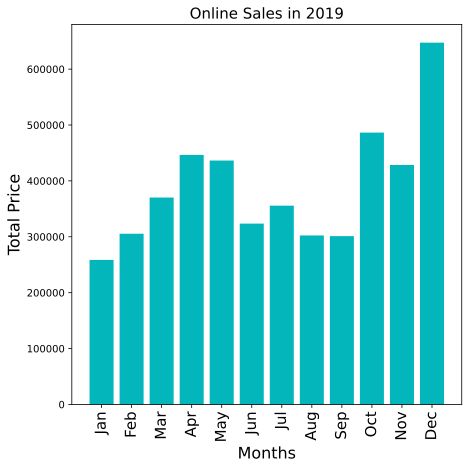

In [209]:
label = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=[7,7])
plt.bar(label, list_of_total, color='#02b6bb')
ticks_x = np.linspace(0,11,12)
plt.xticks(ticks_x, label, fontsize = '15', rotation = 90)

plt.title('Online Sales in 2019', fontsize=15)
plt.xticks(fontsize = '15', rotation = 90)
plt.xlabel('Months', fontsize=16, )
plt.ylabel('Total Price', fontsize=16)
plt.show()